## Homework of The OOP and Dynamic Programming##

** Authors: Liling HUANG, Zhangjie LV, Shurui LIU, Yuhong Zhu, Kaisheng LIAN **

** Jan 27th 2018 **

** Part one The OOP **

####  Exercise 1 ####

In [1]:
class Tax:
    def __init__(self,r,c):   ## r - revenue, c - costs
        self.r, self.c = r, c
        self.temp = 0
    
    def compute_income(self):
        self.newincome = self.r - self.c
        return self.newincome
    
    def brackets_list(self,brackets):
        self.brackets = brackets
        return self.brackets
    
    def percent_list(self,percentlist):
        self.percent = percentlist
        return self.percent
    
    def compute_tax(self):
        if self.newincome < self.brackets[0]:    ### 0 ~ 1 million
            self.temp = self.newincome * self.percent[0]
        elif self.brackets[0] < self.newincome and self.newincome< self.brackets[1]:   ### 1 ~ 2 millions
            self.temp = 1 * self.percent[0] + (self.newincome - 1) * self.percent[1]
        elif self.brackets[1] < self.newincome and self.newincome< self.brackets[2]:  ### 2 ~ 5 millions
            self.temp = 1 * self.percent[0] + 1 * self.percent[1] + (self.newincome - 2) * self.percent[2]
        elif self.brackets[2] < self.newincome:   ### >= 5 millions
            self.temp = 1 * self.percent[0] + 1 * self.percent[1] + 3 * self.percent[2] + (self.newincome - 5) * self.percent[3]
        
        return self.temp
    
    def compute_average_tax_rate(self):
        average_tax_rate = self.temp / self.newincome
        return average_tax_rate

In [2]:
brackets = [1,2,5]
percentlist = [0.10,0.15,0.20,0.25]
type(brackets)
Firm_1 = Tax(105,95)
Firm_1.brackets_list(brackets)
Firm_1.percent_list(percentlist)
print('Income:', Firm_1.compute_income(), 'Million')
print('Tax:', Firm_1.compute_tax(), 'Million')
print('Rate:', Firm_1.compute_average_tax_rate()*100, 'Percent')

Firm_2 = Tax(13,10)
brackets = [1,2,5]
percentlist = [0.10,0.15,0.20,0.25]
Firm_2.brackets_list(brackets)
Firm_2.percent_list(percentlist)
print('Income:', Firm_2.compute_income(), 'Million')
print('Tax:', Firm_2.compute_tax(), 'Million')
print('Rate:', Firm_2.compute_average_tax_rate()*100, 'Percent')

Income: 10 Million
Tax: 2.1 Million
Rate: 21.000000000000004 Percent
Income: 3 Million
Tax: 0.45 Million
Rate: 15.0 Percent


In [5]:
#Solution 2
import numpy as np
class Tax:     
    def __init__(self, r,c):
        self.revenue= r
        self.costs=c
        self.income=r-c
        
    def set_revenue(self, r):
        self.revenue = r
        
    def set_costs(self,c):
        self.costs = c
        
    def compute_income(self):
        return self.revenue- self.costs
    
    def set_brackets(self, b):
        self.brackets = b
    
    def set_percent(self, p):
        self.percent = p
        
    def compute_tax(self):
        if len(self.brackets)==len(self.percent):
            c=self.brackets[1:]
            c.append(-1)
            d=np.asarray(self.brackets).searchsorted(self.income)-1
            c[d]=self.income
            z=(np.asarray(c)-np.asarray(self.brackets))*self.percent
            self.tax=sum(z[:d+1])  # the first to (d+1)th
            return self.tax         
        else:
            return 'Please enter the right tax backets beginning with 0.'
        
    def compute_average_tax_rate(self):
        self.average_tax_rate = self.tax / self.income
        return self.average_tax_rate

In [6]:
bracket_list = [0,1,2,5]
percent_list = [0.1,0.15,0.2,0.25]
Firm_1 = Tax(105,95)
Firm_1.set_brackets(bracket_list)
Firm_1.set_percent(percent_list)
print('Income:', Firm_1.compute_income(), 'Million')
print('Tax:', Firm_1.compute_tax(), 'Million')
print('Rate:', Firm_1.compute_average_tax_rate()*100, 'Percent')

Income: 10 Million
Tax: 2.1 Million
Rate: 21.0 Percent


** Exercise 2 **

In [9]:
class Roulette():
    
    def __init__(self, stash):
        self.money_hold = stash
        self.house_earns = 0
        
    def add_money(sef, money_add):
        self.money_add = money_add
        self.money_hold += money_add
        
    def check_stash(self):
        return self.money_hold
    
    def roll(self):
        self.num_rolled = np.random.randint(1,37)
        R = [2, 4, 6, 8, 10,11,13,15,17,20,22,24,26,28,29,31,33,35]
        B = [1, 3, 5, 7, 9, 12,14,16,18,19,21,23,25,27,30,32,34,36]
        self.bet_style = input("If straight up, just input the number between 0 and 36. O for odd,E for even. R for red, B for black. Choose bet type:")
        self.bet_amount = input('Choose bet amount:')
        if int(self.bet_amount) > self.money_hold:
            print('YOU CANNOT DEPLOY STASH THAT IS MORE THAN THE MONEY YOU HOLD!!')
        else:
            if (self.bet_style is 'E') and (self.num_rolled % 2 == 0):
                self.money_hold += int(self.bet_amount)
                self.house_earns -= int(self.bet_amount)
                print("YOU rolled {1:.0f}YOU WIN!! :-),current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
                
            elif (self.bet_style is 'O') and (self.num_rolled % 2 != 0):
                self.money_hold += int(self.bet_amount) 
                self.house_earns -= int(self.bet_amount)
                print("YOU rolled {1:.0f}YOU WIN!! :-),current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
                
            elif (self.bet_style is 'R') and (self.num_rolled in R):
                self.money_hold += int(self.bet_amount)
                self.house_earns -= int(self.bet_amount)
                print("YOU rolled {1:.0f}YOU WIN!! :-),current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
        
            elif (self.bet_style is 'B') and (self.num_rolled in B):
                self.money_hold += int(self.bet_amount)
                self.house_earns -= int(self.bet_amount)
                print("YOU rolled {1:.0f}YOU WIN!! :-),current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
                
            elif self.bet_style == self.num_rolled:
                self.money_hold += self.bet_amount*35
                self.house_earns -= int(self.bet_amount)*35
                print("YOU rolled {1:.0f}YOU WIN!! :-),current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
                
            else:
                self.money_hold -= int(self.bet_amount)
                self.house_earns += int(self.bet_amount)
                print("YOU rolled {1:.0f} YOU LOSE =(,current stash is:{0:.2f}".format(self.money_hold,self.num_rolled))
                
            
    def check_house_earns(self):
        return self.house_earns

In [10]:
Player1 = Roulette(200)
Player1.roll()

If straight up, just input the number between 0 and 36. O for odd,E for even. R for red, B for black. Choose bet type:E
Choose bet amount:100
YOU rolled 32YOU WIN!! :-),current stash is:300.00


** Exercise 3 **

In [11]:
import numpy as np

class ecdf:
    def __init__(self,x,n):
        self.x, self.n= x,n 
        self.Fn_x = 0
        
    def _call_(self):
        path = []
        X = np.random.randn(self.n)
        k1 = 1
        k2 = 0
        for i in range(len(X)):
            if X[i] <= self.x:
                self.Fn_x += 1
                path.append(k1)
            else:
                self.Fn_x += 0
                path.append(k2)
        return path
    
    def observations(self):
        return sum(self._call_()) / self.n

        ## a test
f1=ecdf(0.5,100)
print(f1._call_())
print(f1.observations())
    

[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1]
0.76


** Exercise 4 **

In [12]:
#EX4
import numpy  as np
class Polynomial:
    def __init__(self,a,x):
        self.a=a
        self.x=x
    def p_x(self):
        t=np.ones(len(self.a))*self.x
        t[0]=1
        t=t.cumprod()
        self.t=self.a*t
        return self.t.sum()
    def p_diff_x(self):
        self.a=self.a[1:]
        t=np.array(range(len(self.a)))+np.ones(len(self.a))
        self.t=self.a*self.x**(t-1)*t
        return self.t.sum()
    


p1=Polynomial(np.array((1,2,3)),2)
print(p1.p_x())
print(p1.p_diff_x())

17.0
14.0


In [13]:
# Loop X  is a rv.
import numpy as np
class Polynomial:
    
    def __init__(self,n,coeff):
        self.n, self.coeff = n, coeff 
        self.x = np.random.randn(100)
    
    def h(self):
        path = []
        for i in range(self.n):
            list_1 = np.zeros(len(self.coeff))
            list_1[:] = self.x[i]
            list_1[0] = 1
            list_2 = np.cumprod(list_1)
            path.append(np.dot(list_2, self.coeff))
        return path
    
    def update(self):
         path2=[]
         for i in range(self.n-1):
            list_1 = np.zeros(len(self.coeff)-1)
            list_1[:] = self.x[i]
            list_1[0] = 1
            list_2 = np.cumprod(list_1)
            path2.append(np.dot(list_2, self.coeff[1:])) 
            return path2
a=Polynomial(3,(1,2,3))
a.update()

[-2.8996170369404028]

**PART 2 Dynamic Programming **

** Exercise 1**

486


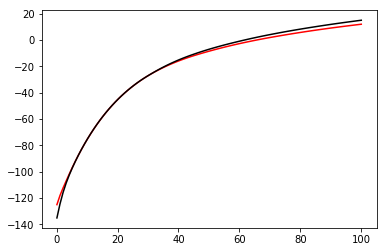

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

beta = 0.95 
num_points = 100 
tol = 1e-10

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points) 
wprime = w_vec-0.005 
value_old_l = np.ones(num_points)
value_old_h = np.ones(num_points)
value_new_l = np.zeros(num_points)
value_new_h = np.zeros(num_points)
policy = np.zeros(num_points) 
ctr = 0

while(np.max(np.abs(value_old_l-value_new_l)) > tol) and (np.max(np.abs(value_old_h-value_new_h)) > tol)  and ctr<1000: 
    np.copyto(value_old_l, value_new_l) 
    np.copyto(value_old_h, value_new_h)
    for ii in np.arange(num_points): 
        value_new_l[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.9*beta*value_old_l[wprime<=w_vec[ii]] + \
        0.1*beta*value_old_h[wprime<=w_vec[ii]])
        value_new_h[ii] = np.max(2*np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.6*beta*value_old_h[wprime<=w_vec[ii]] + \
        0.4*beta*value_old_l[wprime<=w_vec[ii]])
        #policy[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+beta*value_old[wprime<=w_vec[ii]]) 
    ctr = ctr+1 

print(ctr) 
plt.plot(w_vec, value_new_l,'r-',w_vec,value_new_h,'k-')
plt.show()